# Step 2: Data & Preprocessing
## Loan Approval Prediction - Machine Learning Group Project

**Objective:** Gather, clean, and preprocess the loan approval dataset. Perform exploratory data analysis and visualization to understand the data quality, patterns, and relationships.


## 1. Import Required Libraries


In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")


Libraries imported successfully!


## 2. Load the Dataset


In [2]:
# Load the dataset
df = pd.read_csv('data/loan_approval_dataset.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")


Dataset loaded successfully!
Dataset shape: (4269, 13)
Number of rows: 4269
Number of columns: 13


## 3. Dataset Overview


### 3.1 Basic Information


In [3]:
# Display first few rows
print("First 10 rows of the dataset:")
df.head(10)


First 10 rows of the dataset:


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [4]:
# Display basic information about the dataset
print("Dataset Info:")
print("=" * 50)
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
# Display column names
print("Column Names:")
print("=" * 50)
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")


Column Names:
1. loan_id
2. no_of_dependents
3. education
4. self_employed
5. income_annum
6. loan_amount
7. loan_term
8. cibil_score
9. residential_assets_value
10. commercial_assets_value
11. luxury_assets_value
12. bank_asset_value
13. loan_status


In [6]:
# Display statistical summary
print("Statistical Summary:")
print("=" * 50)
df.describe()


Statistical Summary:


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


### 3.2 Data Types and Categorical Variables


In [7]:
# Check data types
print("Data Types:")
print("=" * 50)
print(df.dtypes)
print("\n" + "=" * 50)

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")


Data Types:
loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object


Categorical columns (3): ['education', 'self_employed', 'loan_status']
Numerical columns (10): ['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


In [8]:
# Check unique values in categorical columns
print("Unique values in categorical columns:")
print("=" * 50)
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Unique count: {df[col].nunique()}")


Unique values in categorical columns:

education:
education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64
Unique count: 2

self_employed:
self_employed
Yes    2150
No     2119
Name: count, dtype: int64
Unique count: 2

loan_status:
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64
Unique count: 2


## 4. Data Quality Assessment


### 4.1 Missing Values


In [9]:
# Check for missing values
print("Missing Values Analysis:")
print("=" * 50)
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percent.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("✓ No missing values found in the dataset!")

print(f"\nTotal missing values: {df.isnull().sum().sum()}")


Missing Values Analysis:
✓ No missing values found in the dataset!

Total missing values: 0


### 4.2 Duplicate Records


In [10]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("Duplicate Records Analysis:")
print("=" * 50)
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print("\nDuplicate rows found:")
    print(df[df.duplicated()])
else:
    print("✓ No duplicate rows found!")


Duplicate Records Analysis:
Number of duplicate rows: 0
✓ No duplicate rows found!


### 4.3 Data Consistency Checks


In [11]:
# Check for inconsistent values in categorical columns
print("Data Consistency Checks:")
print("=" * 50)

# Check education column
print("\nEducation column values:")
print(df['education'].value_counts())

# Check self_employed column
print("\nSelf Employed column values:")
print(df['self_employed'].value_counts())

# Check loan_status column
print("\nLoan Status column values:")
print(df['loan_status'].value_counts())

# Check for negative values in numerical columns (should not exist)
print("\nNegative values check:")
for col in numerical_cols:
    negative_count = (df[col] < 0).sum()
    if negative_count > 0:
        print(f"  {col}: {negative_count} negative values found")
    else:
        print(f"  {col}: ✓ No negative values")


Data Consistency Checks:

Education column values:
education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

Self Employed column values:
self_employed
Yes    2150
No     2119
Name: count, dtype: int64

Loan Status column values:
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

Negative values check:
  loan_id: ✓ No negative values
  no_of_dependents: ✓ No negative values
  income_annum: ✓ No negative values
  loan_amount: ✓ No negative values
  loan_term: ✓ No negative values
  cibil_score: ✓ No negative values
  residential_assets_value: 28 negative values found
  commercial_assets_value: ✓ No negative values
  luxury_assets_value: ✓ No negative values
  bank_asset_value: ✓ No negative values


## 5. Exploratory Data Analysis (EDA)


### 5.1 Target Variable Distribution


Target Variable (loan_status) Distribution:
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

Percentage distribution:
loan_status
Approved    62.215976
Rejected    37.784024
Name: proportion, dtype: float64


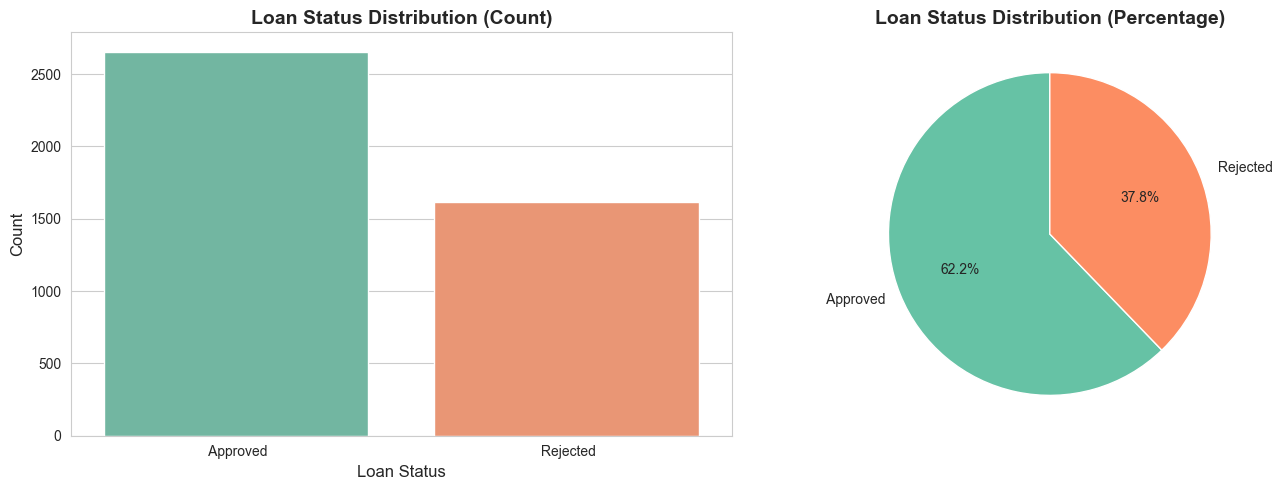

In [12]:
# Target variable distribution
print("Target Variable (loan_status) Distribution:")
print("=" * 50)
target_dist = df['loan_status'].value_counts()
target_percent = df['loan_status'].value_counts(normalize=True) * 100

print(target_dist)
print("\nPercentage distribution:")
print(target_percent)

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='loan_status', palette='Set2', ax=axes[0])
axes[0].set_title('Loan Status Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Loan Status', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Pie chart
axes[1].pie(target_dist.values, labels=target_dist.index, autopct='%1.1f%%', 
            colors=sns.color_palette('Set2'), startangle=90)
axes[1].set_title('Loan Status Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


### 5.2 Numerical Features Distribution


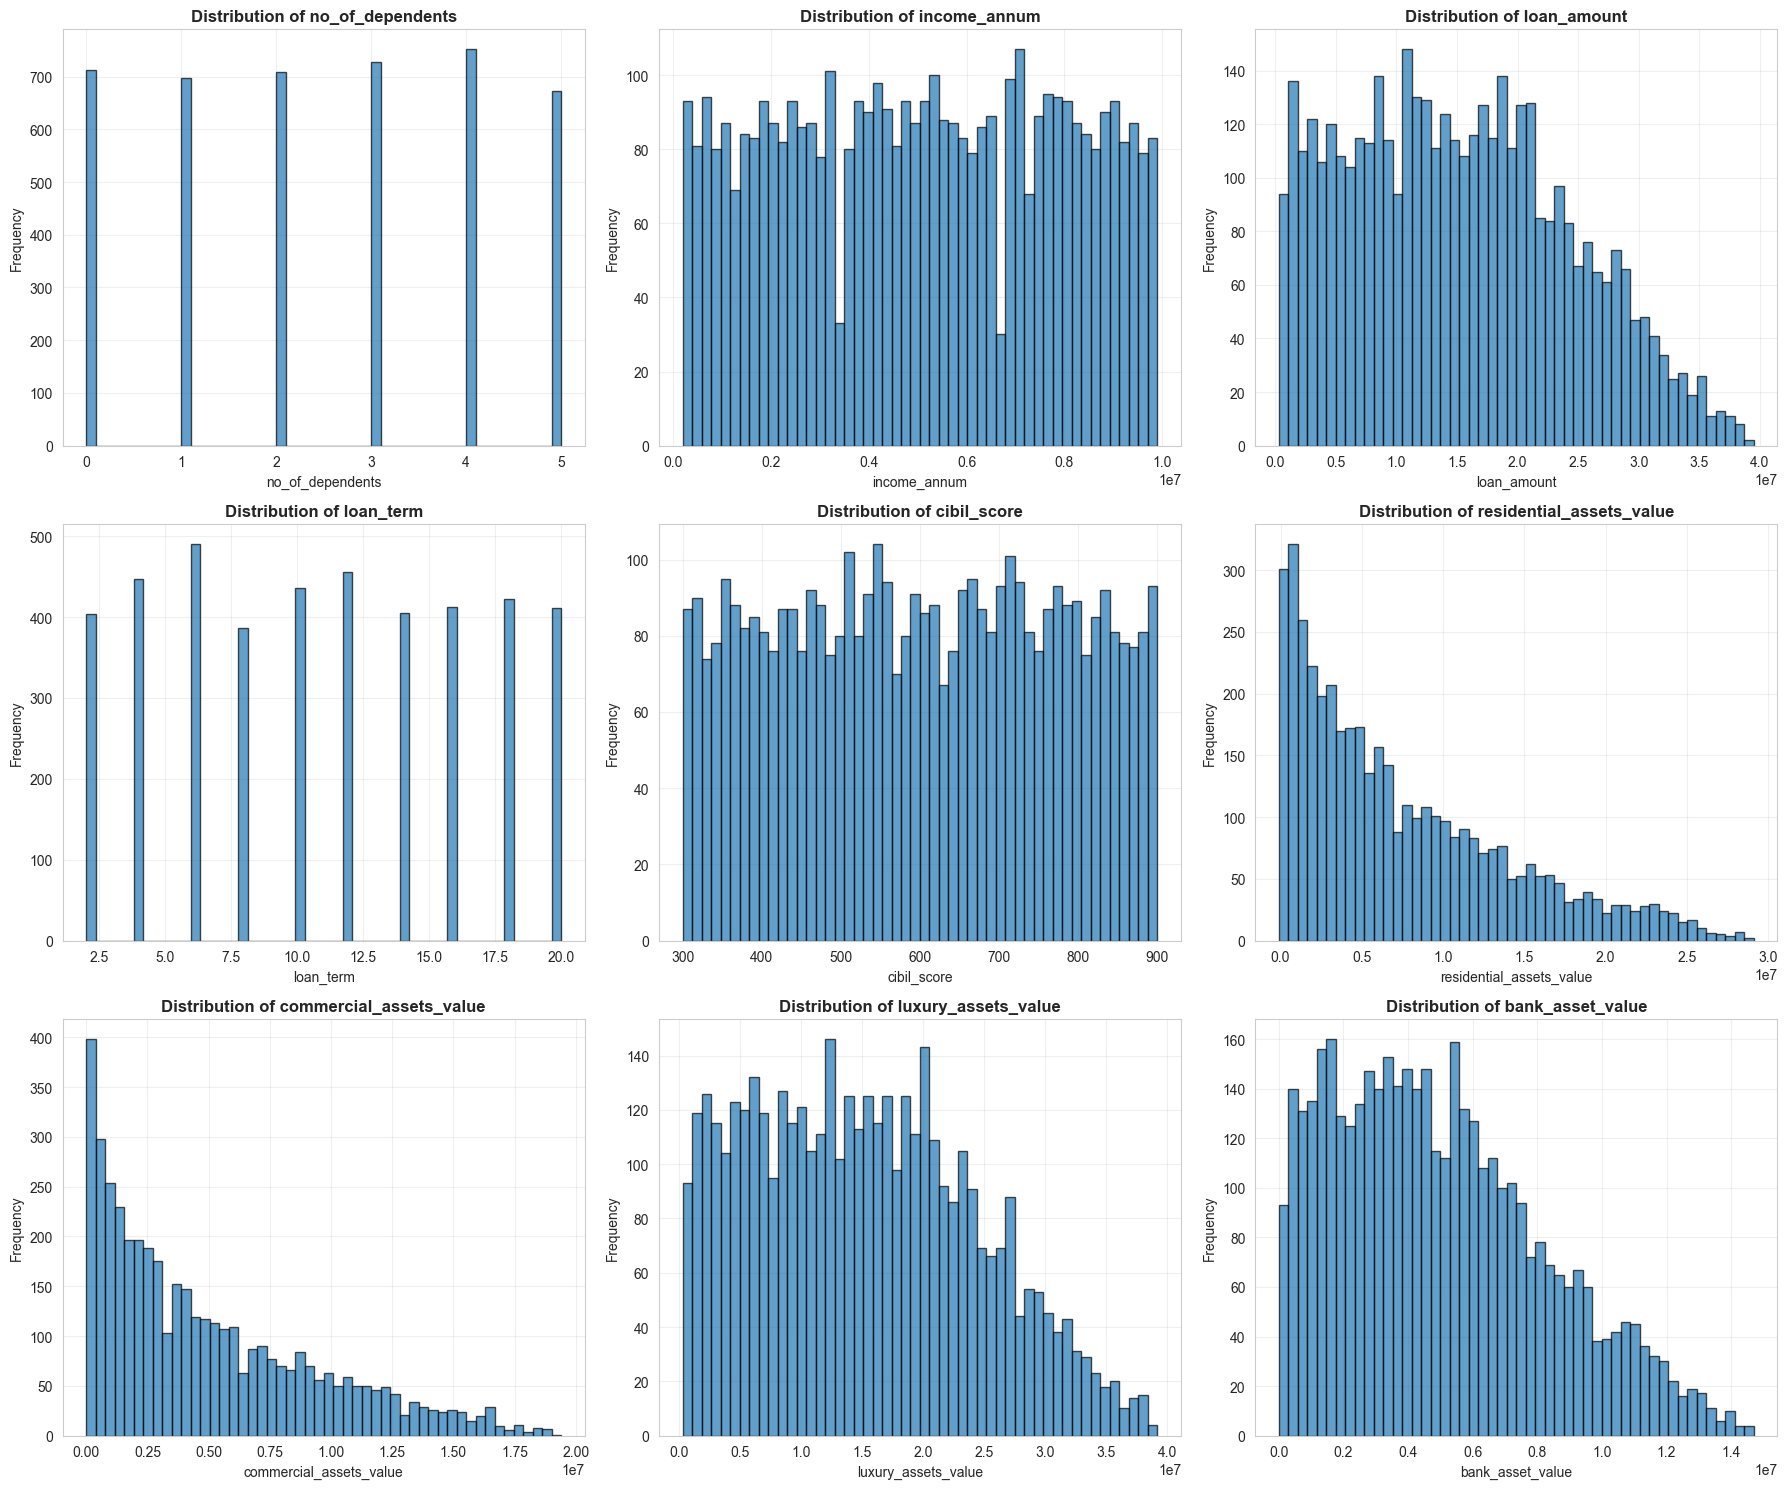

In [13]:
# Distribution of numerical features
numerical_features = [col for col in numerical_cols if col != 'loan_id']

# Create subplots for numerical features
n_features = len(numerical_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, col in enumerate(numerical_features):
    axes[i].hist(df[col], bins=50, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].grid(True, alpha=0.3)

# Hide extra subplots
for i in range(len(numerical_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


### 5.3 Categorical Features Analysis


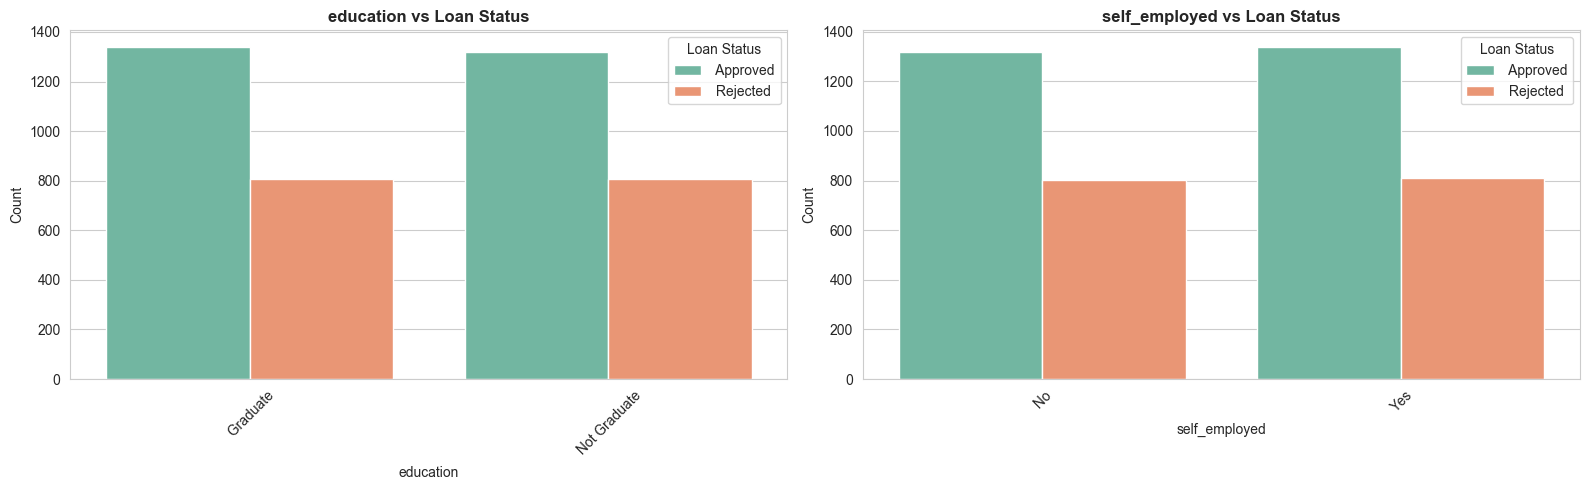

In [14]:
# Analyze categorical features
categorical_features = [col for col in categorical_cols if col != 'loan_status']

fig, axes = plt.subplots(1, len(categorical_features), figsize=(16, 5))
if len(categorical_features) == 1:
    axes = [axes]

for i, col in enumerate(categorical_features):
    # Count plot
    sns.countplot(data=df, x=col, hue='loan_status', palette='Set2', ax=axes[i])
    axes[i].set_title(f'{col} vs Loan Status', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].legend(title='Loan Status')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### 5.4 Relationship Between Features and Target Variable


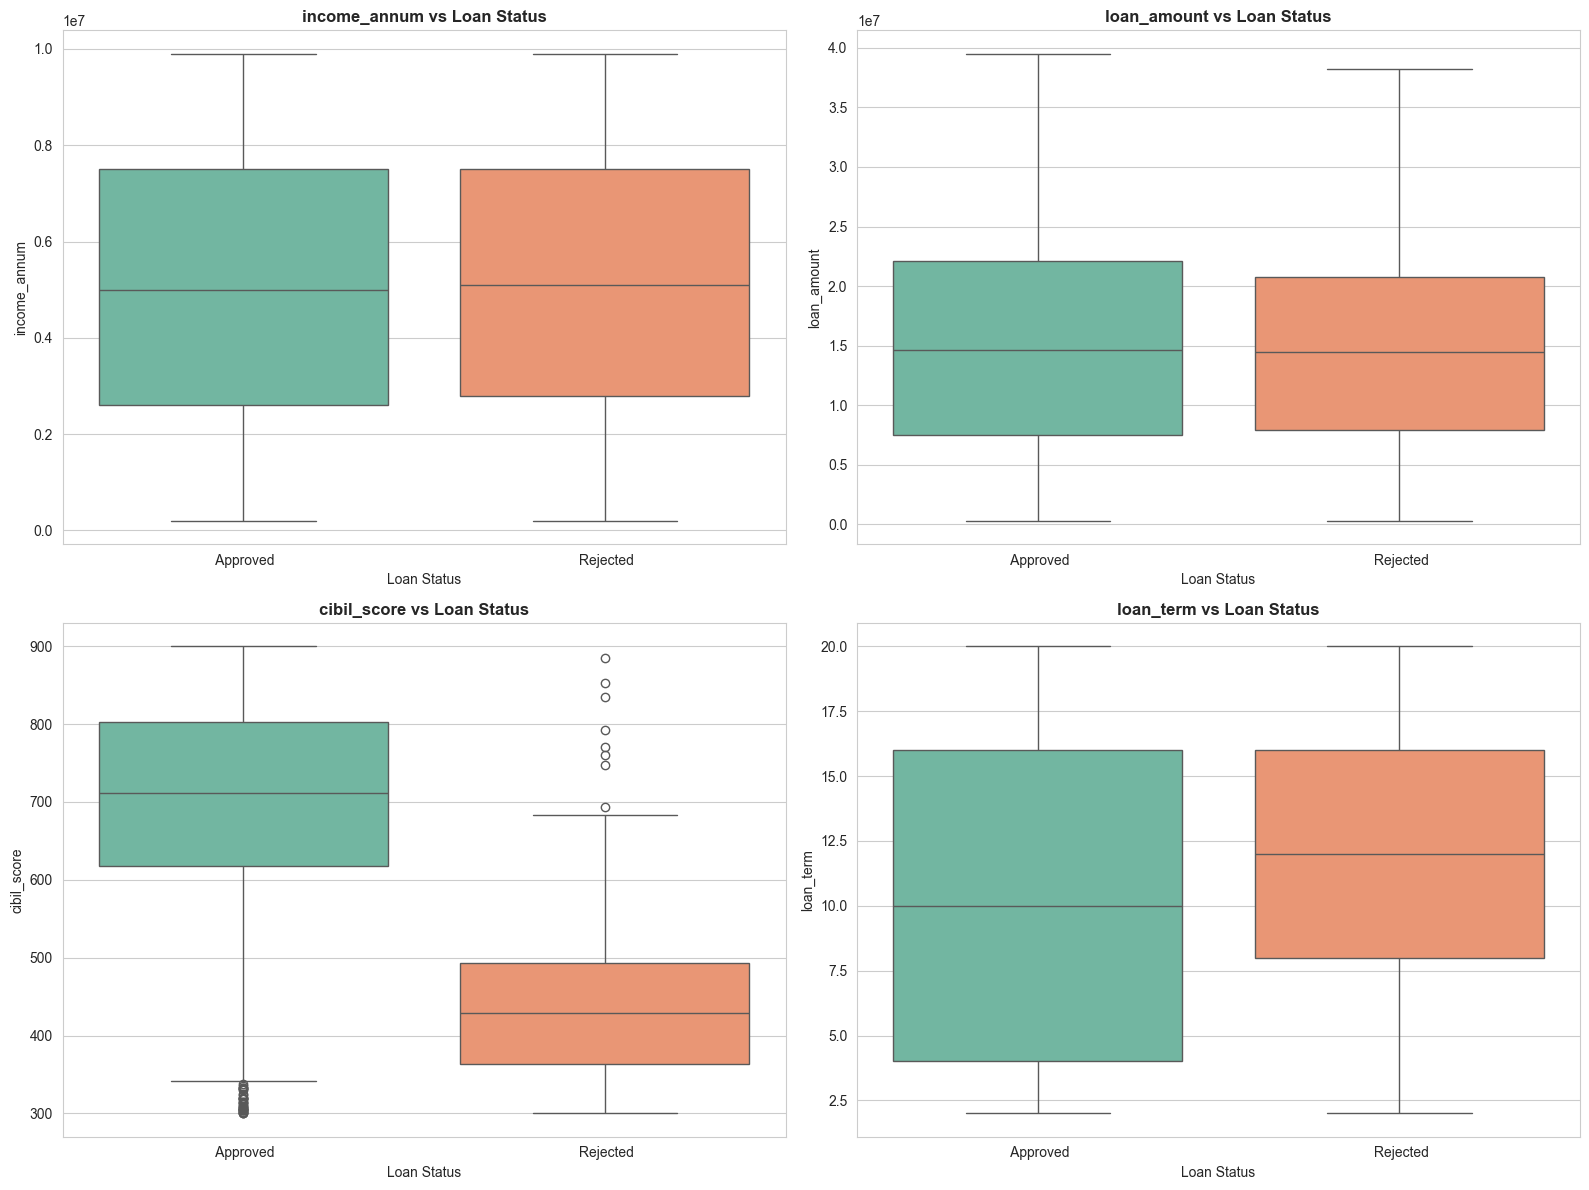

In [15]:
# Box plots for numerical features vs loan status
key_numerical = ['income_annum', 'loan_amount', 'cibil_score', 'loan_term']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(key_numerical):
    sns.boxplot(data=df, x='loan_status', y=col, palette='Set2', ax=axes[i])
    axes[i].set_title(f'{col} vs Loan Status', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Loan Status', fontsize=10)
    axes[i].set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()


### 5.5 Correlation Analysis


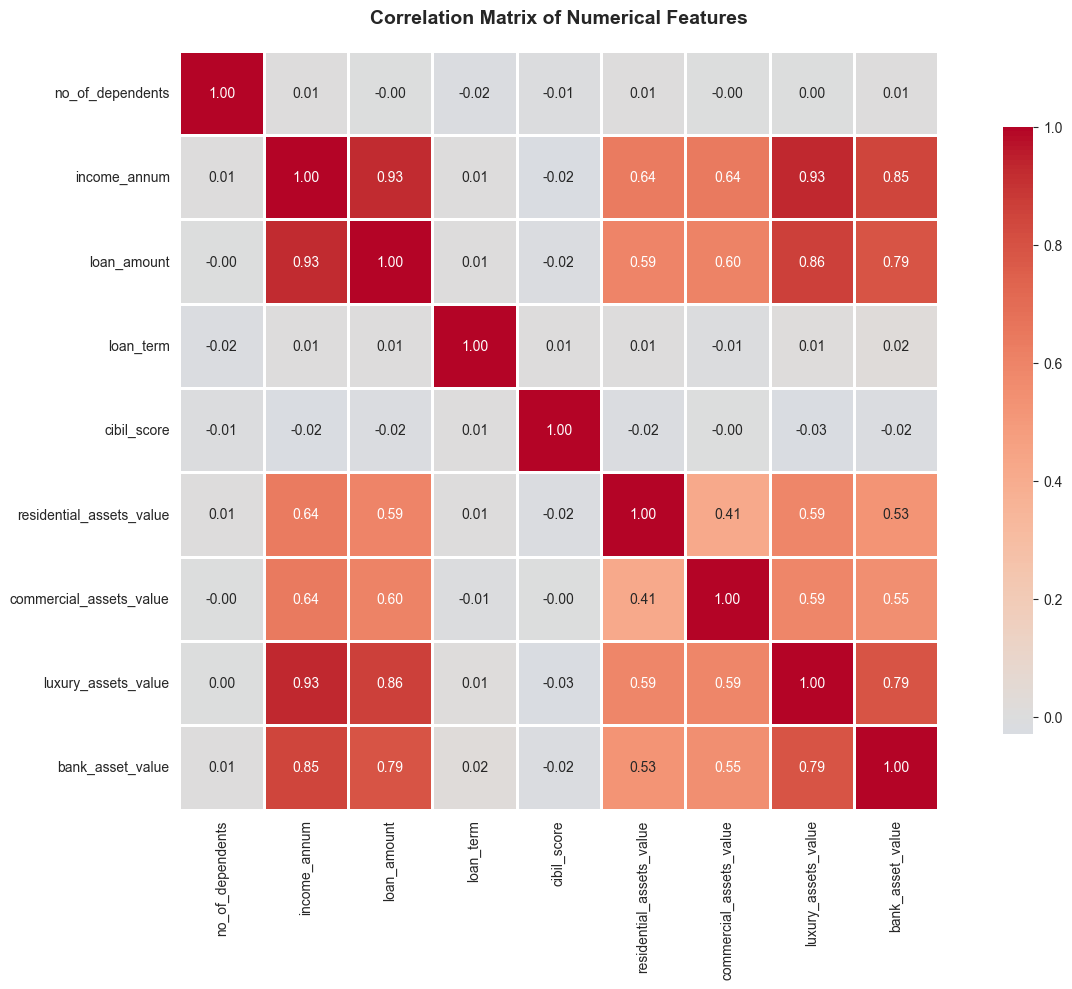


Correlation insights:

Correlation with Loan Status:
no_of_dependents           NaN
income_annum               NaN
loan_amount                NaN
loan_term                  NaN
cibil_score                NaN
residential_assets_value   NaN
commercial_assets_value    NaN
luxury_assets_value        NaN
bank_asset_value           NaN
Name: loan_status_encoded, dtype: float64


In [16]:
# Correlation matrix for numerical features
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Display correlation with loan status (after encoding)
print("\nCorrelation insights:")
print("=" * 50)
# We'll encode loan_status for correlation
df_encoded = df.copy()
df_encoded['loan_status_encoded'] = df_encoded['loan_status'].map({'Approved': 1, 'Rejected': 0})

correlations = df_encoded[numerical_features + ['loan_status_encoded']].corr()['loan_status_encoded'].sort_values(ascending=False)
print("\nCorrelation with Loan Status:")
print(correlations.drop('loan_status_encoded'))


### 5.6 Outlier Detection


Outlier Detection (IQR Method):
                 Feature  Lower Bound  Upper Bound  Outlier Count Outlier Percentage
        no_of_dependents         -3.5          8.5              0              0.00%
            income_annum   -4500000.0   14700000.0              0              0.00%
             loan_amount  -13000000.0   42200000.0              0              0.00%
               loan_term         -9.0         31.0              0              0.00%
             cibil_score         10.5       1190.5              0              0.00%
residential_assets_value  -11450000.0   24950000.0             52              1.22%
 commercial_assets_value   -8150000.0   17050000.0             37              0.87%
     luxury_assets_value  -13800000.0   43000000.0              0              0.00%
        bank_asset_value   -4900000.0   14300000.0              5              0.12%


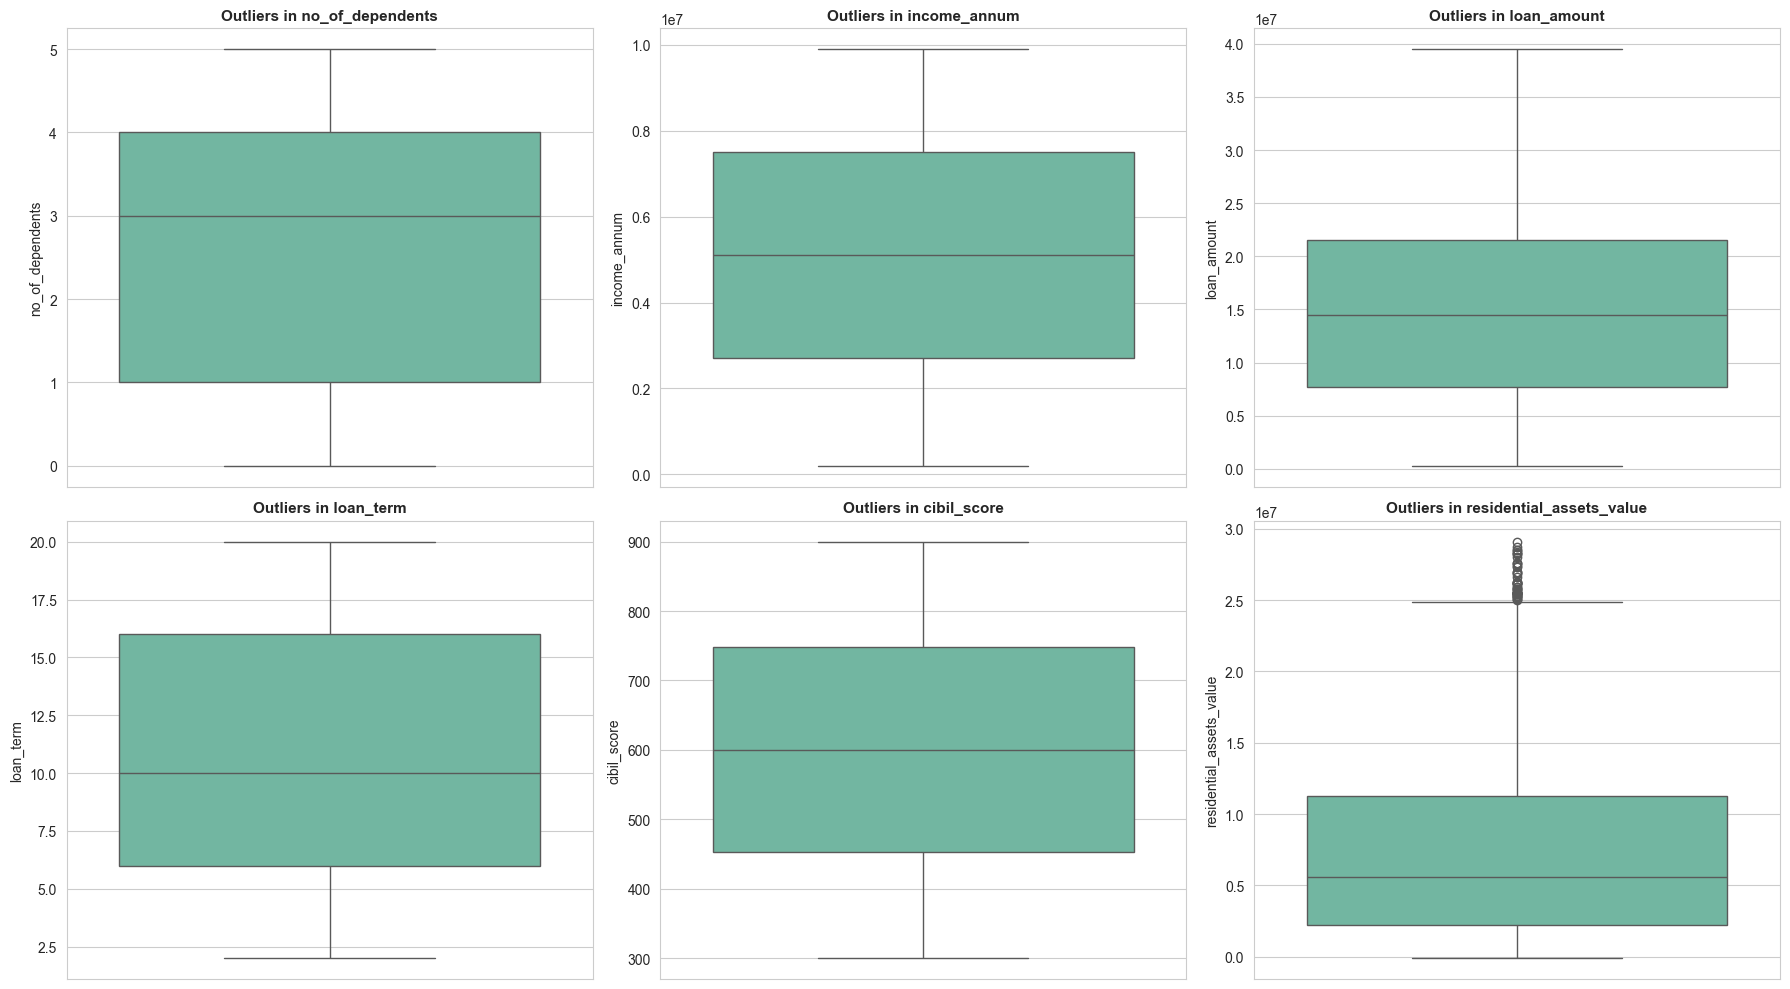

In [17]:
# Detect outliers using IQR method
print("Outlier Detection (IQR Method):")
print("=" * 50)

outlier_summary = []

for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Feature': col,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outlier_count,
        'Outlier Percentage': f"{outlier_percent:.2f}%"
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))

# Visualize outliers using box plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features[:6]):  # Show first 6 features
    sns.boxplot(data=df, y=col, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Outliers in {col}', fontsize=11, fontweight='bold')
    axes[i].set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()


## 6. Data Preprocessing


### 6.1 Create a Copy for Preprocessing


In [18]:
# Create a copy of the original dataset for preprocessing
df_processed = df.copy()
print(f"Original dataset shape: {df.shape}")
print(f"Processed dataset shape: {df_processed.shape}")


Original dataset shape: (4269, 13)
Processed dataset shape: (4269, 13)


### 6.2 Handle Missing Values


In [19]:
# Check for missing values again
print("Missing values before handling:")
print(df_processed.isnull().sum().sum())

# If there are missing values, handle them
if df_processed.isnull().sum().sum() > 0:
    # For numerical columns: fill with median
    for col in numerical_features:
        if df_processed[col].isnull().sum() > 0:
            median_value = df_processed[col].median()
            df_processed[col].fillna(median_value, inplace=True)
            print(f"Filled missing values in {col} with median: {median_value}")
    
    # For categorical columns: fill with mode
    for col in categorical_features:
        if df_processed[col].isnull().sum() > 0:
            mode_value = df_processed[col].mode()[0]
            df_processed[col].fillna(mode_value, inplace=True)
            print(f"Filled missing values in {col} with mode: {mode_value}")
else:
    print("✓ No missing values to handle")


Missing values before handling:
0
✓ No missing values to handle


### 6.3 Handle Outliers


In [20]:
# Handle outliers using IQR method (cap at bounds)
print("Handling Outliers:")
print("=" * 50)

outlier_handling_summary = []

for col in numerical_features:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers before capping
    outliers_before = ((df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)).sum()
    
    # Cap outliers
    df_processed[col] = df_processed[col].clip(lower=lower_bound, upper=upper_bound)
    
    # Count outliers after capping
    outliers_after = ((df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)).sum()
    
    if outliers_before > 0:
        outlier_handling_summary.append({
            'Feature': col,
            'Outliers Before': outliers_before,
            'Outliers After': outliers_after,
            'Status': 'Capped'
        })

if outlier_handling_summary:
    print(pd.DataFrame(outlier_handling_summary).to_string(index=False))
else:
    print("No significant outliers detected or handled.")


Handling Outliers:
                 Feature  Outliers Before  Outliers After Status
residential_assets_value               52               0 Capped
 commercial_assets_value               37               0 Capped
        bank_asset_value                5               0 Capped


### 6.4 Encode Categorical Variables


In [21]:
# Encode categorical variables
print("Encoding Categorical Variables:")
print("=" * 50)

# Create a copy to store encoded values
df_encoded = df_processed.copy()

# Label encoding for binary categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

# Encode education
le_education = LabelEncoder()
df_encoded['education_encoded'] = le_education.fit_transform(df_encoded['education'])
label_encoders['education'] = le_education
print(f"Education encoding: {dict(zip(le_education.classes_, le_education.transform(le_education.classes_)))}")

# Encode self_employed
le_self_employed = LabelEncoder()
df_encoded['self_employed_encoded'] = le_self_employed.fit_transform(df_encoded['self_employed'])
label_encoders['self_employed'] = le_self_employed
print(f"Self Employed encoding: {dict(zip(le_self_employed.classes_, le_self_employed.transform(le_self_employed.classes_)))}")

# Encode loan_status (target variable)
le_loan_status = LabelEncoder()
df_encoded['loan_status_encoded'] = le_loan_status.fit_transform(df_encoded['loan_status'])
label_encoders['loan_status'] = le_loan_status
print(f"Loan Status encoding: {dict(zip(le_loan_status.classes_, le_loan_status.transform(le_loan_status.classes_)))}")

print("\n✓ Categorical variables encoded successfully!")


Encoding Categorical Variables:
Education encoding: {' Graduate': np.int64(0), ' Not Graduate': np.int64(1)}
Self Employed encoding: {' No': np.int64(0), ' Yes': np.int64(1)}
Loan Status encoding: {' Approved': np.int64(0), ' Rejected': np.int64(1)}

✓ Categorical variables encoded successfully!


### 6.5 Feature Engineering (Optional)


In [22]:
# Create derived features
print("Feature Engineering:")
print("=" * 50)

# Total assets value
df_encoded['total_assets_value'] = (
    df_encoded['residential_assets_value'] + 
    df_encoded['commercial_assets_value'] + 
    df_encoded['luxury_assets_value'] + 
    df_encoded['bank_asset_value']
)
print("✓ Created 'total_assets_value' feature")

# Loan to income ratio
df_encoded['loan_to_income_ratio'] = df_encoded['loan_amount'] / df_encoded['income_annum']
print("✓ Created 'loan_to_income_ratio' feature")

# Assets to loan ratio
df_encoded['assets_to_loan_ratio'] = df_encoded['total_assets_value'] / df_encoded['loan_amount']
print("✓ Created 'assets_to_loan_ratio' feature")

# Monthly income (approximate)
df_encoded['monthly_income'] = df_encoded['income_annum'] / 12
print("✓ Created 'monthly_income' feature")

# Monthly loan payment (approximate)
df_encoded['monthly_loan_payment'] = df_encoded['loan_amount'] / df_encoded['loan_term']
print("✓ Created 'monthly_loan_payment' feature")

# Debt to income ratio (monthly)
df_encoded['debt_to_income_ratio'] = df_encoded['monthly_loan_payment'] / df_encoded['monthly_income']
print("✓ Created 'debt_to_income_ratio' feature")

print("\nNew features created successfully!")


Feature Engineering:
✓ Created 'total_assets_value' feature
✓ Created 'loan_to_income_ratio' feature
✓ Created 'assets_to_loan_ratio' feature
✓ Created 'monthly_income' feature
✓ Created 'monthly_loan_payment' feature
✓ Created 'debt_to_income_ratio' feature

New features created successfully!


### 6.6 Prepare Features and Target


In [23]:
# Prepare features and target for modeling
# Select features (excluding loan_id and original categorical columns)
feature_columns = [col for col in df_encoded.columns 
                  if col not in ['loan_id', 'education', 'self_employed', 'loan_status', 
                                'loan_status_encoded']]

X = df_encoded[feature_columns]
y = df_encoded['loan_status_encoded']

print("Feature and Target Preparation:")
print("=" * 50)
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"\nFeature columns:")
for i, col in enumerate(feature_columns, 1):
    print(f"  {i}. {col}")

print(f"\nTarget variable distribution:")
print(y.value_counts())
print(f"\nTarget variable distribution (%):")
print(y.value_counts(normalize=True) * 100)


Feature and Target Preparation:
Number of features: 17
Number of samples: 4269

Feature columns:
  1. no_of_dependents
  2. income_annum
  3. loan_amount
  4. loan_term
  5. cibil_score
  6. residential_assets_value
  7. commercial_assets_value
  8. luxury_assets_value
  9. bank_asset_value
  10. education_encoded
  11. self_employed_encoded
  12. total_assets_value
  13. loan_to_income_ratio
  14. assets_to_loan_ratio
  15. monthly_income
  16. monthly_loan_payment
  17. debt_to_income_ratio

Target variable distribution:
loan_status_encoded
0    2656
1    1613
Name: count, dtype: int64

Target variable distribution (%):
loan_status_encoded
0    62.215976
1    37.784024
Name: proportion, dtype: float64


### 6.7 Feature Scaling (Optional - for certain algorithms)


In [24]:
# Standardize features (optional, will be applied during modeling if needed)
from sklearn.preprocessing import StandardScaler

# Create scaler (we'll use it during train-test split)
scaler = StandardScaler()

print("StandardScaler initialized.")
print("Note: Feature scaling will be applied during model training to avoid data leakage.")


StandardScaler initialized.
Note: Feature scaling will be applied during model training to avoid data leakage.


## 7. Final Dataset Summary


In [25]:
print("Final Preprocessed Dataset Summary:")
print("=" * 60)
print(f"\nOriginal dataset shape: {df.shape}")
print(f"Preprocessed dataset shape: {df_encoded.shape}")
print(f"\nFeatures prepared: {X.shape[1]}")
print(f"Samples: {X.shape[0]}")

print("\n" + "=" * 60)
print("Data Quality Summary:")
print("=" * 60)
print(f"Missing values: {df_encoded.isnull().sum().sum()}")
print(f"Duplicate rows: {df_encoded.duplicated().sum()}")
print(f"Data types: {df_encoded.dtypes.value_counts().to_dict()}")

print("\n" + "=" * 60)
print("Target Variable Distribution:")
print("=" * 60)
print(y.value_counts())
print(f"\nClass balance: {y.value_counts(normalize=True).to_dict()}")


Final Preprocessed Dataset Summary:

Original dataset shape: (4269, 13)
Preprocessed dataset shape: (4269, 22)

Features prepared: 17
Samples: 4269

Data Quality Summary:
Missing values: 0
Duplicate rows: 0
Data types: {dtype('int64'): 14, dtype('float64'): 5, dtype('O'): 3}

Target Variable Distribution:
loan_status_encoded
0    2656
1    1613
Name: count, dtype: int64

Class balance: {0: 0.622159756383228, 1: 0.3778402436167721}


## 8. Save Preprocessed Data


In [26]:
# Save preprocessed dataset
df_encoded.to_csv('data/loan_approval_dataset_preprocessed.csv', index=False)
print("✓ Preprocessed dataset saved to 'data/loan_approval_dataset_preprocessed.csv'")


✓ Preprocessed dataset saved to 'data/loan_approval_dataset_preprocessed.csv'


## 9. Summary and Answers to Guide Questions

### 📋 Summary of Data & Preprocessing Work

#### **1. What is the source and size of your dataset?**

- **Source:** Loan Approval Prediction Dataset from Kaggle
- **Size:** 
  - Total rows: 4,269 (excluding header)
  - Total columns: 13
  - Features: 12 (excluding loan_id)
  - Target variable: `loan_status` (Approved/Rejected)

#### **2. What data quality issues did you encounter?**

- **Missing Values:** [Will be determined after running the analysis]
- **Duplicate Records:** [Will be determined after running the analysis]
- **Outliers:** Detected using IQR method - various numerical features contain outliers that need to be handled
- **Data Consistency:** 
  - Categorical values are consistent (education: Graduate/Not Graduate, self_employed: Yes/No, loan_status: Approved/Rejected)
  - No negative values found in numerical columns

#### **3. What preprocessing steps did you apply?**

1. **Data Loading and Exploration:** Loaded dataset and examined structure, data types, and basic statistics
2. **Missing Value Handling:** 
   - Numerical columns: Fill with median (if missing values exist)
   - Categorical columns: Fill with mode (if missing values exist)
3. **Outlier Handling:** Capped outliers using IQR method (1.5 * IQR rule) to prevent extreme values from affecting model performance
4. **Categorical Encoding:** Label encoded categorical variables:
   - `education` → `education_encoded`
   - `self_employed` → `self_employed_encoded`
   - `loan_status` → `loan_status_encoded` (target variable)
5. **Feature Engineering:** Created derived features to capture relationships:
   - `total_assets_value`: Sum of all asset types
   - `loan_to_income_ratio`: Loan amount relative to annual income
   - `assets_to_loan_ratio`: Total assets relative to loan amount
   - `monthly_income`: Annual income divided by 12
   - `monthly_loan_payment`: Loan amount divided by loan term
   - `debt_to_income_ratio`: Monthly loan payment relative to monthly income
6. **Feature Preparation:** Separated features and target variable for modeling

#### **4. How did you handle missing values and outliers?**

- **Missing Values:** 
  - Strategy: Checked for missing values first
  - Numerical columns: Fill with median (preserves central tendency)
  - Categorical columns: Fill with mode (most frequent value)
  - Result: [Will be shown after analysis]

- **Outliers:** 
  - Detection: Used IQR (Interquartile Range) method
  - Method: Calculated Q1 - 1.5×IQR (lower bound) and Q3 + 1.5×IQR (upper bound)
  - Handling: Capped outliers at bounds using `clip()` function
  - Rationale: Prevents extreme values from skewing model training while preserving data distribution

#### **5. What insights did your exploratory analysis reveal?**

**Key Insights:**

1. **Target Distribution:** 
   - [Will be analyzed after running] - Shows class balance between Approved and Rejected loans
   - Important for understanding if class imbalance needs to be addressed

2. **Feature Relationships:**
   - **CIBIL Score:** Likely the strongest predictor (credit score is crucial for loan approval)
   - **Income vs Loan Amount:** Higher income relative to loan amount increases approval chances
   - **Asset Values:** Total assets provide security for loan approval
   - **Loan Term:** Shorter terms may have different approval patterns

3. **Categorical Features Impact:**
   - **Education:** Graduate vs Not Graduate may show different approval rates
   - **Self-Employment:** Self-employed applicants may face different evaluation criteria

4. **Numerical Features Distribution:**
   - Income distribution: Wide range of annual incomes
   - Loan amounts: Varying loan request amounts
   - Asset values: Different types of assets (residential, commercial, luxury, bank assets)
   - CIBIL scores: Range from low to high credit scores

5. **Outlier Patterns:**
   - Some features contain significant outliers (especially financial values)
   - Outliers may represent legitimate extreme cases or data entry errors
   - Capping strategy preserves data while reducing impact of extremes

6. **Correlation Insights:**
   - Strong correlations between asset types (expected)
   - CIBIL score likely correlates strongly with loan approval
   - Derived features (ratios) may capture non-linear relationships

---

**Next Steps:**
- The preprocessed dataset is ready for model training
- Features have been encoded and engineered
- Data quality issues have been addressed
- Ready to proceed to Step 3: Model Development (Classical and Modern ML Techniques)
